In [2]:
from platform import python_version

print(python_version())

3.8.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import glob
import os
import matplotlib.patches as patches

In [4]:
# RUN_ENV='KATE'
# RUN_ENV='JN'
RUN_ENV='GERRY'

In [5]:
APP_FOLDER=''
if RUN_ENV=='JN':
    APP_FOLDER='/Users/jialingcai/Documents/607_608_project/'

if RUN_ENV=='GERRY':
    APP_FOLDER='C:/Final/'

METADATA_FOLDER=APP_FOLDER+'Metadata/'
NEW_DATA_FOLDER=APP_FOLDER+'NewData/'
DATASET1_PATH=APP_FOLDER+'/SourceData/DataSet1/'
##for dataset 1
XMLSCHEMA_FILE=METADATA_FOLDER+'dataset1.xsd'

DATASET2_PATH=APP_FOLDER+'/SourceData/DataSet2/'

* Basic info
* KNN & Ramdon forest (upsampling and downsampling/ new combined dataset)
* tf(for samller dataset/use larger dataset to test tf model)

In [6]:
df2 = pd.read_csv(DATASET2_PATH+'train.csv')
df2.shape

(15412, 6)

In [7]:
df2.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [8]:
val = df2.classname.unique()
vall=[]
for i in val:
    vall.append(i)
k=0
a=[]
for j in vall:
    v = sum(1*(df2['classname']==j))
    a.append(v)

res = {vall[i]:a[i] for i in range(len(vall))}
res = sorted(res.items(), key=lambda x:x[1])
x=[res[i][0] for i in range(len(res))]
y=[res[i][1] for i in range(len(res))]
dic_d2 = dict(zip(x,y))

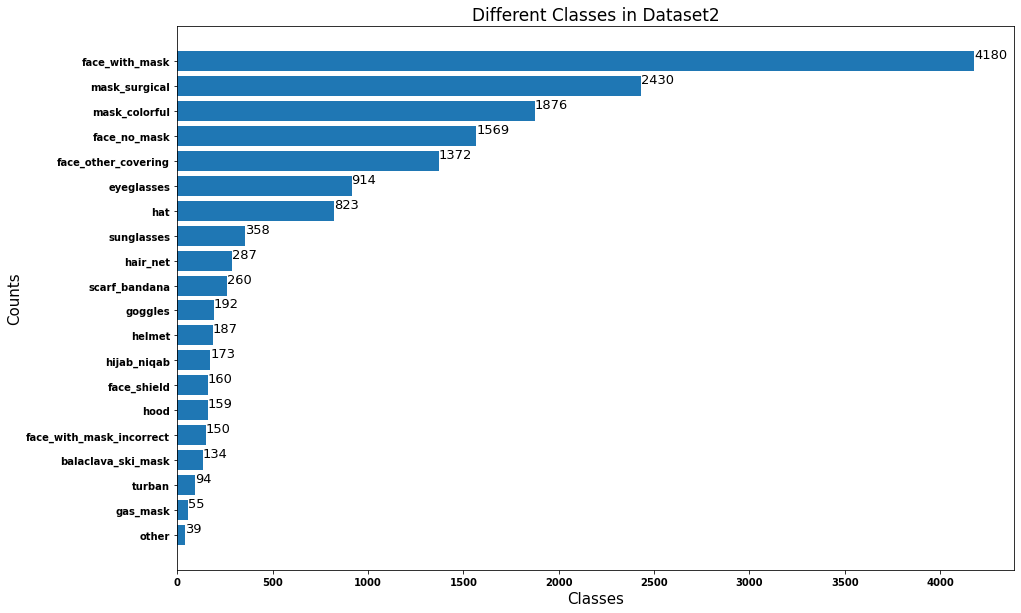

In [9]:
fig,ax = plt.subplots(figsize=(15,10))

ax.barh(x,y)

for index,val in enumerate(y):
    ax.text(val,index,str(val),fontsize=13, va='bottom')
    
plt.title('Different Classes in Dataset2',fontsize=17)
plt.ylabel('Counts',fontsize=15)
plt.xlabel('Classes',fontsize=15)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.show()

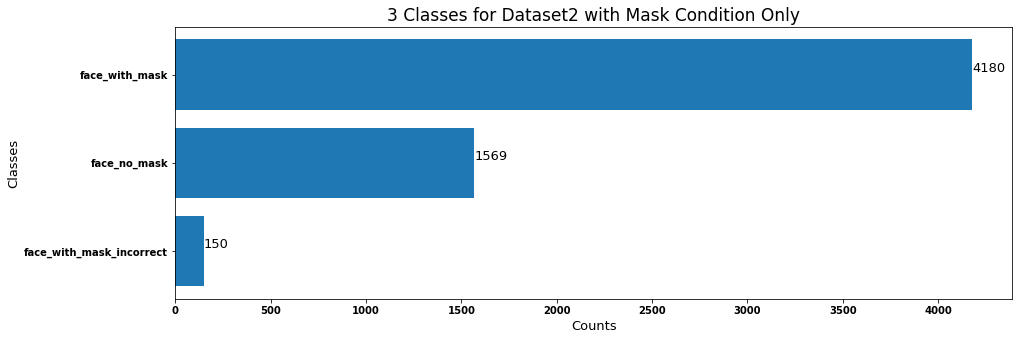

In [10]:
k=[]
I = ['face_with_mask_incorrect','face_no_mask','face_with_mask']
dic_ = {k:v for (k,v) in dic_d2.items() if k in I}
#print(dic_)
fig,ax = plt.subplots(figsize=(15,5))

x = [i for i in dic_.keys()]
y = [i for i in dic_.values()]

    
ax.barh(x,y,)
for index,val in enumerate(y):
    plt.text(val,index,str(val),fontsize=13, va='bottom')

plt.title('3 Classes for Dataset2 with Mask Condition Only',fontsize=17)
plt.xlabel('Counts',fontsize=13)
plt.ylabel('Classes',fontsize=13)
plt.yticks(weight = 'bold')
plt.xticks(weight = 'bold')
plt.show()

In [64]:
x,y

(['face_with_mask_incorrect', 'face_no_mask', 'face_with_mask'],
 [150, 1569, 4180])

In [13]:
df = pd.read_csv(METADATA_FOLDER+'dataset1_images.csv')
df.head()

,filename,folder,segmented,depth,height,width,object_id,xmax,xmin,ymax,ymin,difficult,name,occluded,truncated
0,maksssksksss0.png,images,0,3,366,512,0,109,79,142,105,0,without_mask,0,0
1,maksssksksss0.png,images,0,3,366,512,1,226,185,144,100,0,with_mask,0,0
2,maksssksksss0.png,images,0,3,366,512,2,360,325,141,90,0,without_mask,0,0
3,maksssksksss1.png,images,0,3,156,400,0,354,321,69,34,0,with_mask,0,0
4,maksssksksss1.png,images,0,3,156,400,1,261,224,73,38,0,with_mask,0,0


In [14]:
l=[]
vel = df.name.unique()
for i in vel:
    l.append(i)
ll=[]
for i in l:
    k = len(df[df['name']==i] )
    ll.append(k)
print(l)

['without_mask', 'with_mask', 'mask_weared_incorrect']


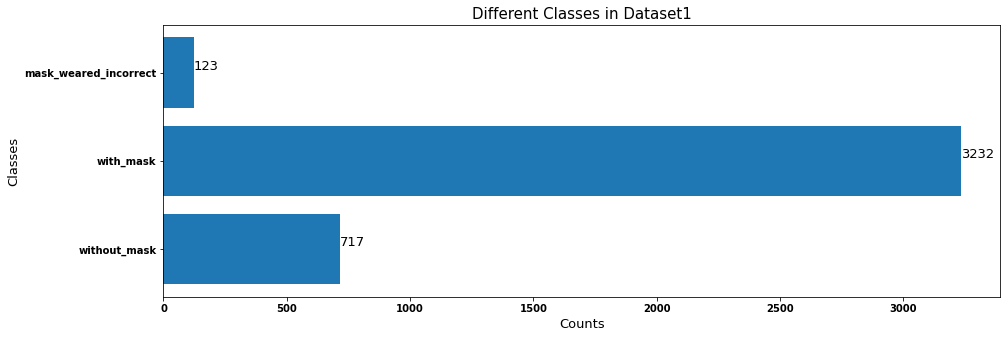

In [15]:
fig,ax = plt.subplots(figsize=(15,5))

ax.barh(l,ll,)
for index, val in enumerate(ll):
    plt.text(val, index, str(val),fontsize=13, va='bottom')
    
    
plt.title('Different Classes in Dataset1',fontsize=15)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.ylabel('Classes',fontsize=13)
plt.xlabel('Counts',fontsize=13)
plt.show()

In [16]:
print(f'There are total {sum(ll)} faces in dataset1, total {sum(y)} faces in dataset2')

There are total 4072 faces in dataset1, total 5899 faces in dataset2


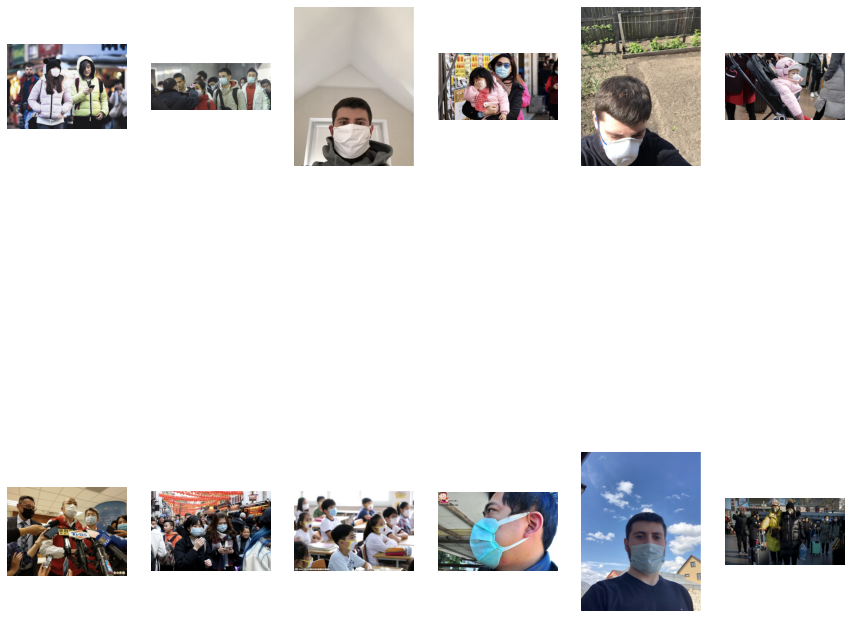

In [18]:
path = glob.glob(DATASET1_PATH+'images/*.png')
m=6
n=2
fig, axes = plt.subplots(n, m,figsize=(15,15))

for i in range(m*n):
    with open(path[i],'rb') as f:
        image=Image.open(f)
        ax = axes[i // m][i % m]
        ax.imshow(image)
        ax.set_axis_off()

### look images

In [19]:
df = pd.read_csv(METADATA_FOLDER+'train.csv')
df.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [20]:
df = df.sort_values('name')
df.head()

,name,x1,x2,y1,y2,classname
13381,1801.jpg,451,186,895,697,face_no_mask
3464,1802.jpg,160,151,268,265,mask_surgical
3463,1802.jpg,110,71,273,272,face_with_mask
14836,1803.jpg,147,200,288,320,mask_surgical
14835,1803.jpg,126,75,303,333,face_with_mask


In [21]:
def get_img_dataset2 (index):
    img_name = df['name'][index]
    classname = df[df['name']==img_name]['classname'][index]
    x1 = df[df['name']==img_name]['x1'][index]
    x2 = df[df['name']==img_name]['x2'][index]
    y1 = df[df['name']==img_name]['y1'][index]
    y2 = df[df['name']==img_name]['y2'][index]
    img_path = DATASET2_PATH+'/Medical mask/Medical mask/Medical Mask/images'
    imge = plt.imread(os.path.join(img_path,img_name))
    return (img_name,classname,x1,x2,y1,y2,imge)

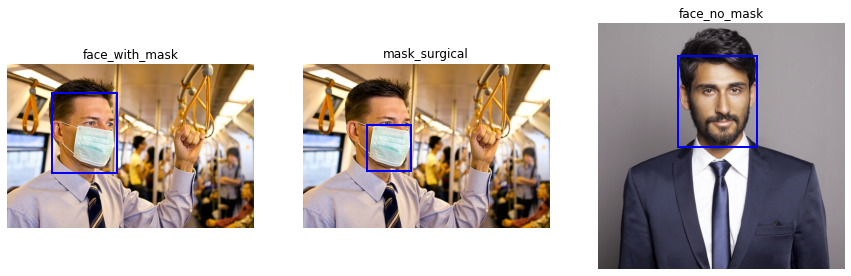

In [22]:
fig,[ax1,ax2,ax3] = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

img_name,classname,x1,x2,y1,y2,imge = get_img_dataset2(13381)
#fig, axs = plt.subplots(1, 3, figsize=(9, 3))
ax3.set_title(f'{classname}')
rect = patches.Rectangle((x1,x2),y1-x1,y2-x2,linewidth=2,edgecolor='b',facecolor='none')
ax3.add_patch(rect)
ax3.set_axis_off()
ax3.imshow(imge)
#face with no mask


img_name,classname,x1,x2,y1,y2,imge = get_img_dataset2(3463)

ax1.set_title(f'{classname}')
rect = patches.Rectangle((x1,x2),y1-x1,y2-x2,linewidth=2,edgecolor='b',facecolor='none')
ax1.add_patch(rect)
ax1.set_axis_off()
ax1.imshow(imge)

img_name,classname,x1,x2,y1,y2,imge = get_img_dataset2(3464)
ax2.set_title(f'{classname}')
rect = patches.Rectangle((x1,x2),y1-x1,y2-x2,linewidth=2,edgecolor='b',facecolor='none')
ax2.add_patch(rect)
ax2.set_axis_off()
ax2.imshow(imge)
#face with mask

plt.show()

In [25]:
df2 = pd.read_csv(METADATA_FOLDER+'dataset1_images.csv')
df2.head()

,filename,folder,segmented,depth,height,width,object_id,xmax,xmin,ymax,ymin,difficult,name,occluded,truncated
0,maksssksksss0.png,images,0,3,366,512,0,109,79,142,105,0,without_mask,0,0
1,maksssksksss0.png,images,0,3,366,512,1,226,185,144,100,0,with_mask,0,0
2,maksssksksss0.png,images,0,3,366,512,2,360,325,141,90,0,without_mask,0,0
3,maksssksksss1.png,images,0,3,156,400,0,354,321,69,34,0,with_mask,0,0
4,maksssksksss1.png,images,0,3,156,400,1,261,224,73,38,0,with_mask,0,0


In [26]:
def get_img_dataset1 (index):
    img_name = df2['filename'][index]
    name = df2[df2['filename']==img_name]['name'][index]
    xmax = df2[df2['filename']==img_name]['xmax'][index]
    xmin = df2[df2['filename']==img_name]['xmin'][index]
    ymax = df2[df2['filename']==img_name]['ymax'][index]
    ymin = df2[df2['filename']==img_name]['ymin'][index]
    img_path = DATASET1_PATH+'images'
    imge = plt.imread(os.path.join(img_path,img_name))
    return (img_name,name,xmax,xmin,ymax,ymin,imge)

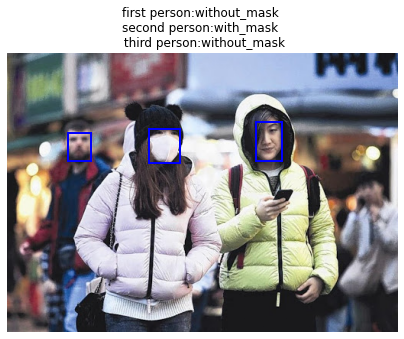

In [18]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

img_name1,name1,xmax,xmin,ymax,ymin,imge = get_img_dataset1(0)
ax.imshow(imge)
rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
img_name2,name2,xmax,xmin,ymax,ymin,imge = get_img_dataset1(1)
rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)

img_name3,name3,xmax,xmin,ymax,ymin,imge = get_img_dataset1(2)
rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)

ax.set_axis_off()


plt.title(f'first person:{name1} \nsecond person:{name2} \n third person:{name3}')
plt.show()

### second dataset2

In [27]:
df = pd.read_csv(METADATA_FOLDER+'train.csv')
df.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [28]:
df_new = df.loc[(df['classname']=='face_no_mask') | (df['classname']=='face_with_mask_incorrect') |
                (df['classname']=='face_with_mask')]

In [29]:
df_new.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
4,6098.jpg,360,85,728,653,face_no_mask
5,6427.png,218,98,577,580,face_with_mask_incorrect
7,4591.png,239,9,522,342,face_with_mask


In [30]:
df_new.classname.unique(),df_new.shape

(array(['face_with_mask', 'face_no_mask', 'face_with_mask_incorrect'],
       dtype=object),
 (5899, 6))

In [31]:
df_new = df_new.rename(columns = {'x1':'xmax'})
df_new = df_new.rename(columns = {'x2':'xmin'})
df_new = df_new.rename(columns = {'y1':'ymax'})
df_new = df_new.rename(columns = {'y2':'ymin'})
df_new.sort_values('name')

,name,xmax,xmin,ymax,ymin,classname
13381,1801.jpg,451,186,895,697,face_no_mask
3463,1802.jpg,110,71,273,272,face_with_mask
14835,1803.jpg,126,75,303,333,face_with_mask
5867,1804.jpg,112,113,262,307,face_with_mask
6194,1805.jpg,728,180,853,336,face_with_mask
...,...,...,...,...,...,...
13549,6433.png,669,105,798,281,face_with_mask
13547,6433.png,146,107,304,313,face_with_mask
13548,6433.png,536,152,665,333,face_with_mask
9508,6434.jpg,315,82,775,783,face_with_mask


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [33]:

def get_label (label):
    if label=='face_no_mask':
        return 0
    elif label == 'face_with_mask_incorrect':
        return 1
    else:
        return 2

def get_face_mask_date(image_path, coords):
    image_obj = load_img(image_path)
    cropped_image = image_obj.crop(coords)
    newsize = (224, 224) 
    cropped_image=cropped_image.resize(newsize)
    return cropped_image


In [34]:
%%time
absolute_path = DATASET2_PATH+'Medical mask/Medical mask/Medical Mask/images'
data = []
labels =[]

for index, row in df_new.iterrows():
    label = get_label(row['classname'])
    img_file = absolute_path+'/'+row['name']
    image=get_face_mask_date(img_file,(row['xmin'],row['ymin'],row['xmax'],row['ymax']))
    image = img_to_array(image)
    data.append(image)
    labels.append(label) 

Wall time: 46.6 s


In [35]:
np.unique(labels),np.shape(data)

(array([0, 1, 2]), (5899, 224, 224, 3))

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [37]:
data = np.array(data)
labels = np.array(labels)
data_reshape = data.reshape(data.shape[0],data.shape[1]*data.shape[2]*data.shape[3])
data_reshape.shape,labels.shape

((5899, 150528), (5899,))

In [38]:
(trainX, testX, trainY, testY) = train_test_split(data_reshape, labels,
                                                  test_size=0.20, stratify=labels, random_state=42)

In [39]:
print(f'Dataset2: \nTrain X shape = {trainX.shape}, Train Y shape = {trainY.shape}\nTest X shape = {testX.shape}, Test Y shape = {testY.shape}')

Dataset2: 
Train X shape = (4719, 150528), Train Y shape = (4719,)
Test X shape = (1180, 150528), Test Y shape = (1180,)


In [40]:
%%time

knn = KNeighborsClassifier()
model_knn = knn.fit(trainX,trainY)
y_pre = model_knn.predict(testX)

Wall time: 18.8 s


In [41]:
knn_acc = np.mean(y_pre == testY)
print(f'The accuracy by using KNN method is {knn_acc:.4f}')

The accuracy by using KNN method is 0.6788


In [42]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(trainX,trainY)
ypre = rfmodel.predict(testX)
acc_rf = np.mean(ypre==testY)
acc_rf

Wall time: 4min 41s


0.7042372881355933